In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [150]:
df=pd.read_csv(r"C:\Users\Divya\sunbeam assignments\vehicles.csv")
df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [3]:
##EDA##

In [151]:
df.shape

(426880, 26)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [153]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [154]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [155]:
df.dtypes

id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
dtype: object

In [156]:
df['cylinders'].value_counts()

cylinders
6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: count, dtype: int64

In [157]:
df['manufacturer'].value_counts()

manufacturer
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin

In [158]:
df['model'].value_counts()

model
f-150                       8009
silverado 1500              5140
1500                        4211
camry                       3135
silverado                   3023
                            ... 
Huyndai Sante Fe Limited       1
astro awd 4x4                  1
escalade and                   1
cx 3                           1
Paige Glenbrook Touring        1
Name: count, Length: 29667, dtype: int64

In [159]:
df['VIN'].value_counts()

VIN
1FMJU1JT1HEA52352    261
3C6JR6DT3KG560649    235
1FTER1EH1LLA36301    231
5TFTX4CN3EX042751    227
1GCHTCE37G1186784    214
                    ... 
2G4GP5EX5E9213578      1
1GCEK19J78Z219711      1
JA4AT3AW1AZ006543      1
4T1BF28B61U153724      1
SAJGX2749VCOO8376      1
Name: count, Length: 118264, dtype: int64

In [160]:
df['county'].value_counts()

Series([], Name: count, dtype: int64)

In [161]:
df['drive'].value_counts()

drive
4wd    131904
fwd    105517
rwd     58892
Name: count, dtype: int64

In [162]:
df['fuel'].value_counts()

fuel
gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: count, dtype: int64

In [163]:
df['transmission'].value_counts()

transmission
automatic    336524
other         62682
manual        25118
Name: count, dtype: int64

In [164]:
df['type'].value_counts()

type
sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: count, dtype: int64

In [165]:
df['paint_color'].value_counts()

paint_color
white     79285
black     62861
silver    42970
blue      31223
red       30473
grey      24416
green      7343
custom     6700
brown      6593
yellow     2142
orange     1984
purple      687
Name: count, dtype: int64

In [166]:
df['title_status'].value_counts()

title_status
clean         405117
rebuilt         7219
salvage         3868
lien            1422
missing          814
parts only       198
Name: count, dtype: int64

##Cleaning##

In [167]:
df.duplicated().sum()

0

In [168]:
df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [169]:
df['cylinders'] = df['cylinders'].str.extract('(\d+)').astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Divya\AppData\Local\Temp\ipykernel_11540\932335125.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['cylinders'] = df['cylinders'].str.extract('(\d+)').astype(float)


In [170]:
df['cylinders'].unique()

array([nan,  8.,  6.,  4.,  5.,  3., 10., 12.])

In [171]:
df['cylinders'].value_counts()

cylinders
6.0     94169
4.0     77642
8.0     72062
5.0      1712
10.0     1455
3.0       655
12.0      209
Name: count, dtype: int64

In [172]:
df = df.dropna(subset=['cylinders'])

In [173]:
df['cylinders'].unique()

array([ 8.,  6.,  4.,  5.,  3., 10., 12.])

In [174]:
df['cylinders'].value_counts()

cylinders
6.0     94169
4.0     77642
8.0     72062
5.0      1712
10.0     1455
3.0       655
12.0      209
Name: count, dtype: int64

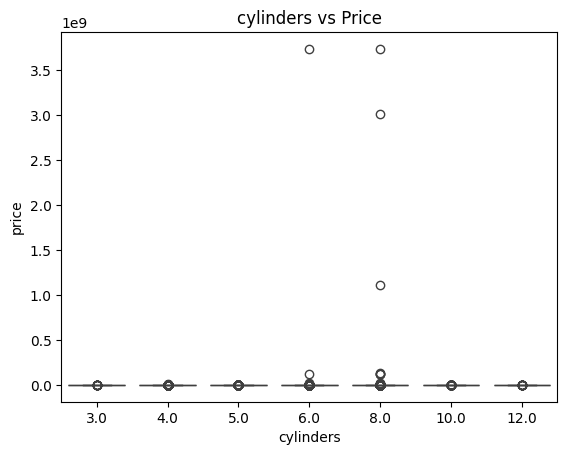

In [175]:
sns.boxplot(x='cylinders', y='price', data=df)
plt.title('cylinders vs Price')
plt.show()

In [176]:
correlation = df[['cylinders', 'price']].corr()
print(correlation)

           cylinders     price
cylinders   1.000000  0.003878
price       0.003878  1.000000


In [177]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
27,7316814884,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8.0,...,NaN,pickup,white,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T12:31:18-0500
28,7316814758,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,22590,2010.0,chevrolet,silverado 1500,good,8.0,...,NaN,pickup,blue,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T12:31:08-0500
29,7316814989,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,39590,2020.0,chevrolet,silverado 1500 crew,good,8.0,...,NaN,pickup,red,https://images.craigslist.org/01212_jjirIWa0y0...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T12:31:25-0500
30,7316743432,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,30990,2017.0,toyota,tundra double cab sr,good,8.0,...,NaN,pickup,red,https://images.craigslist.org/00x0x_1y9kIOzGCF...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T10:41:31-0500
31,7316356412,https://auburn.craigslist.org/cto/d/auburn-uni...,auburn,https://auburn.craigslist.org,15000,2013.0,ford,f-150 xlt,excellent,6.0,...,full-size,truck,black,https://images.craigslist.org/00404_l4loxHvdQe...,2013 F-150 XLT V6 4 Door. Good condition. Leve...,NaN,al,32.592,-85.5189,2021-05-03T14:02:03-0500


In [178]:
df = df.dropna(subset=['drive'])

In [179]:
df['manufacturer'].unique()

array(['ford', 'gmc', 'chevrolet', 'toyota', 'jeep', 'nissan', 'honda',
       'dodge', 'chrysler', 'ram', 'mercedes-benz', nan, 'infiniti',
       'bmw', 'volkswagen', 'mazda', 'porsche', 'lexus', 'buick',
       'hyundai', 'cadillac', 'acura', 'kia', 'rover', 'volvo', 'ferrari',
       'pontiac', 'audi', 'mitsubishi', 'subaru', 'lincoln', 'jaguar',
       'fiat', 'mini', 'saturn', 'alfa-romeo', 'mercury', 'tesla',
       'harley-davidson', 'datsun', 'aston-martin', 'land rover',
       'morgan'], dtype=object)

In [180]:
df = df.dropna(subset=['manufacturer'])

In [181]:
df = df.dropna(subset=['title_status'])

In [182]:
df = df.dropna(subset=['transmission'])

In [183]:
df = df.dropna(subset=['condition'])

In [184]:
df = df.dropna(subset=['fuel'])

In [185]:
df = df.dropna(subset=['model'])

In [186]:
df = df.dropna(subset=['paint_color'])

In [187]:
df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year                 0
manufacturer         0
model                0
condition            0
cylinders            0
fuel                 0
odometer          1005
title_status         0
transmission         0
VIN              61685
drive                0
size             44243
type              8971
paint_color          0
image_url            0
description          0
county          125522
state                0
lat                568
long               568
posting_date         0
dtype: int64

In [188]:
df.shape

(125522, 26)

In [189]:
df.drop(columns=['id', 'url','region_url','county','VIN','description','image_url','size'], inplace=True)

In [190]:
manufacturer_counts=df['manufacturer'].value_counts()

In [191]:
threshold =10338
frequent_manufacturers = manufacturer_counts[manufacturer_counts >= threshold].index

In [192]:
df['manufacturer_grouped'] = df['manufacturer'].apply(
    lambda x: x if manufacturer_counts[x] >= threshold else 'Other'
)

In [193]:
df['manufacturer_grouped'].value_counts()

manufacturer_grouped
Other        72244
ford         22858
chevrolet    19489
toyota       10931
Name: count, dtype: int64

In [194]:
df = df.dropna(subset=['type'])

In [195]:
print(df['type'].value_counts())

type
sedan          31106
SUV            27710
truck          15570
pickup         12958
coupe           8328
hatchback       4322
van             3429
other           3371
convertible     3346
wagon           3029
mini-van        2728
offroad          479
bus              175
Name: count, dtype: int64


In [196]:
print(df['model'].value_counts())

model
f-150                        1917
silverado 1500               1682
1500                         1041
camry                         920
accord                        849
                             ... 
crosstrek 2.0 limited awd       1
300 john varvatos               1
versa note s plus               1
silverado lt 2500               1
gand wagoneer                   1
Name: count, Length: 11538, dtype: int64


In [197]:
df['model'].unique()

array(['f-150 xlt', 'sierra 2500 hd extended cab',
       'silverado 1500 double', ..., 'cruze, 2lt', 'cj 3a willys',
       'gand wagoneer'], dtype=object)

In [198]:
top_n = 15
top_models = df['model'].value_counts().nlargest(top_n).index

df['model_grouped'] = df['model'].apply(lambda x: x if x in top_models else "Other")

print(df['model_grouped'].value_counts())


model_grouped
Other             103160
f-150               1917
silverado 1500      1682
1500                1041
camry                920
accord               849
wrangler             815
civic                798
silverado            766
altima               766
tacoma               714
corvette             664
2500                 645
escape               633
mustang              600
explorer             581
Name: count, dtype: int64


In [199]:
print(df['model_grouped'].value_counts())

model_grouped
Other             103160
f-150               1917
silverado 1500      1682
1500                1041
camry                920
accord               849
wrangler             815
civic                798
silverado            766
altima               766
tacoma               714
corvette             664
2500                 645
escape               633
mustang              600
explorer             581
Name: count, dtype: int64


In [200]:
df['model_grouped'].unique()

array(['Other', 'tacoma', 'accord', 'escape', 'silverado 1500',
       'silverado', 'f-150', 'camry', 'altima', '2500', 'wrangler',
       'civic', '1500', 'corvette', 'explorer', 'mustang'], dtype=object)

In [201]:
df['title_status'].unique()

array(['clean', 'rebuilt', 'salvage', 'missing', 'lien', 'parts only'],
      dtype=object)

In [202]:
print(df['title_status'].value_counts())

title_status
clean         110470
rebuilt         3540
salvage         1435
lien             856
missing          196
parts only        54
Name: count, dtype: int64


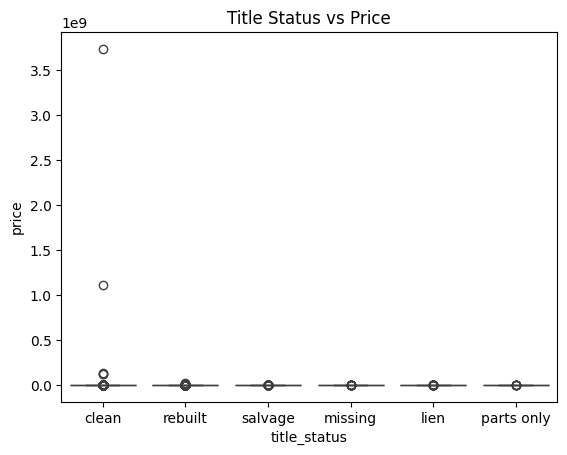

In [203]:
sns.boxplot(x='title_status', y='price', data=df)
plt.title('Title Status vs Price')
plt.show()

In [204]:
#df['year'] = df['year'].fillna(df['year'].median()[0])
df['odometer'] = df['odometer'].fillna(df['odometer'].median())
df['lat'] = df['lat'].fillna(df['lat'].median())
df['long'] = df['long'].fillna(df['long'].median())


In [205]:
df.isnull().sum()

region                  0
price                   0
year                    0
manufacturer            0
model                   0
condition               0
cylinders               0
fuel                    0
odometer                0
title_status            0
transmission            0
drive                   0
type                    0
paint_color             0
state                   0
lat                     0
long                    0
posting_date            0
manufacturer_grouped    0
model_grouped           0
dtype: int64

In [206]:
df.dtypes

region                   object
price                     int64
year                    float64
manufacturer             object
model                    object
condition                object
cylinders               float64
fuel                     object
odometer                float64
title_status             object
transmission             object
drive                    object
type                     object
paint_color              object
state                    object
lat                     float64
long                    float64
posting_date             object
manufacturer_grouped     object
model_grouped            object
dtype: object

In [207]:
df['state'].value_counts()

state
ca    12986
fl     8161
ny     6506
tx     5714
oh     5466
nc     4385
mi     4378
pa     4225
wi     3813
ia     3071
or     3031
va     2983
ma     2873
nj     2843
tn     2774
il     2689
mn     2662
co     2435
az     2348
ok     2235
in     2118
ks     2006
id     1801
sc     1785
ct     1627
ga     1622
wa     1541
ky     1507
vt     1385
al     1321
mo     1278
nm     1203
mt     1175
md     1058
ar      990
ak      906
me      826
nh      820
ri      811
dc      754
nv      742
la      690
hi      587
sd      403
de      352
ms      344
ne      338
ut      303
wv      266
nd      226
wy      188
Name: count, dtype: int64

In [208]:
threshold = 3813

In [209]:
rare_states = df['state'].value_counts()[df['state'].value_counts() < threshold].index

In [210]:
df['state_grouped'] = df['state'].apply(lambda x: 'Other' if x in rare_states else x)

In [211]:
print(df['state_grouped'].value_counts())

state_grouped
Other    60917
ca       12986
fl        8161
ny        6506
tx        5714
oh        5466
nc        4385
mi        4378
pa        4225
wi        3813
Name: count, dtype: int64


In [212]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,drive,type,paint_color,state,lat,long,posting_date,manufacturer_grouped,model_grouped,state_grouped
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6.0,gas,128000.0,clean,...,rwd,truck,black,al,32.5920,-85.518900,2021-05-03T14:02:03-0500,ford,Other,Other
32,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8.0,gas,68696.0,clean,...,4wd,pickup,black,al,32.5900,-85.480000,2021-05-03T13:41:25-0500,Other,Other,Other
33,auburn,34590,2016.0,chevrolet,silverado 1500 double,good,6.0,gas,29499.0,clean,...,4wd,pickup,silver,al,32.5900,-85.480000,2021-05-03T12:41:33-0500,chevrolet,Other,Other
34,auburn,35000,2019.0,toyota,tacoma,excellent,6.0,gas,43000.0,clean,...,4wd,truck,grey,al,32.6013,-85.443974,2021-05-03T12:12:59-0500,toyota,tacoma,Other
35,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6.0,gas,17302.0,clean,...,4wd,pickup,red,al,32.5900,-85.480000,2021-05-03T11:31:14-0500,chevrolet,Other,Other


In [213]:
df.dtypes

region                   object
price                     int64
year                    float64
manufacturer             object
model                    object
condition                object
cylinders               float64
fuel                     object
odometer                float64
title_status             object
transmission             object
drive                    object
type                     object
paint_color              object
state                    object
lat                     float64
long                    float64
posting_date             object
manufacturer_grouped     object
model_grouped            object
state_grouped            object
dtype: object

In [214]:
current_year = 2025
df['car_age'] = current_year - df['year']
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,type,paint_color,state,lat,long,posting_date,manufacturer_grouped,model_grouped,state_grouped,car_age
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6.0,gas,128000.0,clean,...,truck,black,al,32.5920,-85.518900,2021-05-03T14:02:03-0500,ford,Other,Other,12.0
32,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8.0,gas,68696.0,clean,...,pickup,black,al,32.5900,-85.480000,2021-05-03T13:41:25-0500,Other,Other,Other,13.0
33,auburn,34590,2016.0,chevrolet,silverado 1500 double,good,6.0,gas,29499.0,clean,...,pickup,silver,al,32.5900,-85.480000,2021-05-03T12:41:33-0500,chevrolet,Other,Other,9.0
34,auburn,35000,2019.0,toyota,tacoma,excellent,6.0,gas,43000.0,clean,...,truck,grey,al,32.6013,-85.443974,2021-05-03T12:12:59-0500,toyota,tacoma,Other,6.0
35,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6.0,gas,17302.0,clean,...,pickup,red,al,32.5900,-85.480000,2021-05-03T11:31:14-0500,chevrolet,Other,Other,9.0


In [215]:
df.drop(columns=['manufacturer', 'state','model'], inplace=True)

In [216]:
df['year']

31        2013.0
32        2012.0
33        2016.0
34        2019.0
35        2016.0
           ...  
426859    2020.0
426860    2017.0
426866    2016.0
426874    2018.0
426878    2018.0
Name: year, Length: 116551, dtype: float64

In [217]:
df['year'].value_counts()

year
2013.0    8481
2014.0    7826
2015.0    7477
2017.0    7472
2016.0    7432
          ... 
1925.0       2
1900.0       1
1918.0       1
1905.0       1
1944.0       1
Name: count, Length: 102, dtype: int64

In [218]:
df['posting_date'].value_counts()

posting_date
2021-04-23T22:13:05-0400    12
2021-04-13T13:19:15-0500    11
2021-04-16T12:07:56-0500    10
2021-04-29T20:06:09-0500     9
2021-04-07T22:10:01-0500     8
                            ..
2021-04-08T19:05:59-0500     1
2021-04-09T09:11:26-0500     1
2021-04-09T10:11:27-0500     1
2021-04-09T11:31:03-0500     1
2021-04-04T03:21:11-0600     1
Name: count, Length: 110736, dtype: int64

In [221]:
df['posting_date'] = pd.to_datetime(df['posting_date'], errors='coerce')

In [222]:
df['posting_date'] = df['posting_date'].dt.tz_localize(None)

In [223]:
df['posting_date'].value_counts()

posting_date
2021-04-13 13:19:15    11
2021-04-16 12:07:56    10
2021-04-29 20:06:09     9
2021-04-30 10:39:01     8
2021-04-16 12:07:22     8
                       ..
2021-05-03 18:13:42     1
2021-05-03 19:44:46     1
2021-05-04 07:54:23     1
2021-04-05 10:00:54     1
2021-04-04 08:13:14     1
Name: count, Length: 27773, dtype: int64

In [224]:
df['posting_date'].dtypes

dtype('<M8[ns]')

In [225]:
df['posting_year'] = df['posting_date'].dt.year
df['posting_month'] = df['posting_date'].dt.month
df['posting_day'] = df['posting_date'].dt.day

In [226]:
df.drop('posting_date', axis=1, inplace=True)

In [227]:
df['posting_year'].value_counts()

posting_year
2021.0    29283
Name: count, dtype: int64

In [228]:
df['posting_year'].unique()

array([2021.,   nan])

In [229]:
df['posting_month'].value_counts()

posting_month
4.0    21710
5.0     7573
Name: count, dtype: int64

In [230]:
df['posting_month'].unique()

array([ 5.,  4., nan])

In [231]:
df['posting_day'].value_counts()

posting_day
3.0     2471
4.0     2281
30.0    2025
1.0     1940
23.0    1618
29.0    1355
28.0    1245
26.0    1244
27.0    1170
22.0    1114
24.0    1085
2.0     1079
21.0     835
16.0     760
19.0     759
14.0     695
20.0     680
9.0      665
17.0     648
8.0      640
15.0     617
7.0      597
25.0     570
5.0      561
18.0     528
13.0     486
12.0     458
10.0     451
6.0      439
11.0     267
Name: count, dtype: int64

In [232]:
df.isnull().sum()

region                      0
price                       0
year                        0
condition                   0
cylinders                   0
fuel                        0
odometer                    0
title_status                0
transmission                0
drive                       0
type                        0
paint_color                 0
lat                         0
long                        0
manufacturer_grouped        0
model_grouped               0
state_grouped               0
car_age                     0
posting_year            87268
posting_month           87268
posting_day             87268
dtype: int64

In [233]:
#df.drop(columns=['year'], inplace=True)

In [234]:
#df.isnull().sum()

In [235]:
df = df.dropna(subset=['year'])

In [236]:
df = df.dropna(subset=['posting_year'])

In [237]:
df['posting_year'].value_counts()

posting_year
2021.0    29283
Name: count, dtype: int64

In [238]:
df = df.dropna(subset=['posting_month'])

In [239]:
df = df.dropna(subset=['posting_day'])

In [240]:
df['car_age'] = df['car_age'].fillna(current_year)

In [241]:
df.isnull().sum()

region                  0
price                   0
year                    0
condition               0
cylinders               0
fuel                    0
odometer                0
title_status            0
transmission            0
drive                   0
type                    0
paint_color             0
lat                     0
long                    0
manufacturer_grouped    0
model_grouped           0
state_grouped           0
car_age                 0
posting_year            0
posting_month           0
posting_day             0
dtype: int64

In [242]:
df.head(10)

,region,price,year,condition,cylinders,fuel,odometer,title_status,transmission,drive,...,paint_color,lat,long,manufacturer_grouped,model_grouped,state_grouped,car_age,posting_year,posting_month,posting_day
31,auburn,15000,2013.0,excellent,6.0,gas,128000.0,clean,automatic,rwd,...,black,32.5920,-85.518900,ford,Other,Other,12.0,2021.0,5.0,3.0
32,auburn,27990,2012.0,good,8.0,gas,68696.0,clean,other,4wd,...,black,32.5900,-85.480000,Other,Other,Other,13.0,2021.0,5.0,3.0
33,auburn,34590,2016.0,good,6.0,gas,29499.0,clean,other,4wd,...,silver,32.5900,-85.480000,chevrolet,Other,Other,9.0,2021.0,5.0,3.0
34,auburn,35000,2019.0,excellent,6.0,gas,43000.0,clean,automatic,4wd,...,grey,32.6013,-85.443974,toyota,tacoma,Other,6.0,2021.0,5.0,3.0
35,auburn,29990,2016.0,good,6.0,gas,17302.0,clean,other,4wd,...,red,32.5900,-85.480000,chevrolet,Other,Other,9.0,2021.0,5.0,3.0
36,auburn,38590,2011.0,good,8.0,gas,30237.0,clean,other,rwd,...,red,32.5900,-85.480000,chevrolet,Other,Other,14.0,2021.0,5.0,3.0
38,auburn,32990,2017.0,good,6.0,gas,30041.0,clean,other,4wd,...,silver,32.5900,-85.480000,Other,Other,Other,8.0,2021.0,5.0,2.0
42,auburn,37990,2016.0,good,8.0,gas,9704.0,clean,other,rwd,...,red,32.5900,-85.480000,chevrolet,Other,Other,9.0,2021.0,5.0,1.0
45,auburn,27990,2018.0,good,6.0,gas,37332.0,clean,other,4wd,...,silver,32.5900,-85.480000,Other,Other,Other,7.0,2021.0,5.0,1.0
55,auburn,19900,2004.0,good,8.0,diesel,88000.0,clean,automatic,4wd,...,blue,32.5475,-85.468200,ford,Other,Other,21.0,2021.0,4.0,29.0


In [243]:
#numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
#print(numerical_columns)

In [98]:
#numerical_columns = ['year', 'cylinders', 'odometer', 'lat', 'long', 'car_age',
  #     'posting_year', 'posting_month', 'posting_day']

In [99]:
#Q1 = df['numerical_columns'].quantile(0.25)
#Q3 = df['numerical_columns'].quantile(0.75)
# = Q3 - Q1
#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR
#outliers = df[(df['numerical_columns'] < lower_bound) | (df['numerical_columns'] > upper_bound)]


In [100]:
df.shape

(29283, 22)

##Visualizatioon##

<Axes: xlabel='drive'>

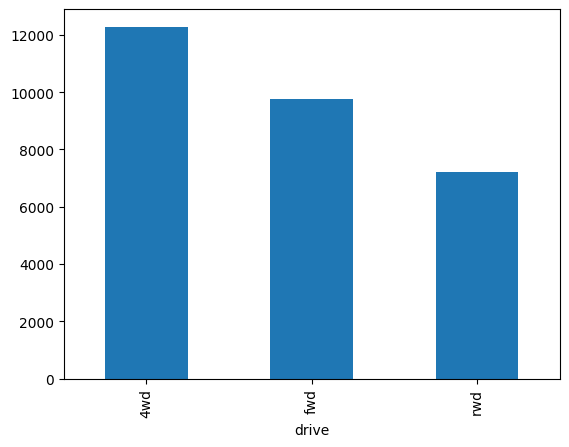

In [101]:
df['drive'].value_counts().plot(kind='bar')

<Axes: xlabel='manufacturer_grouped'>

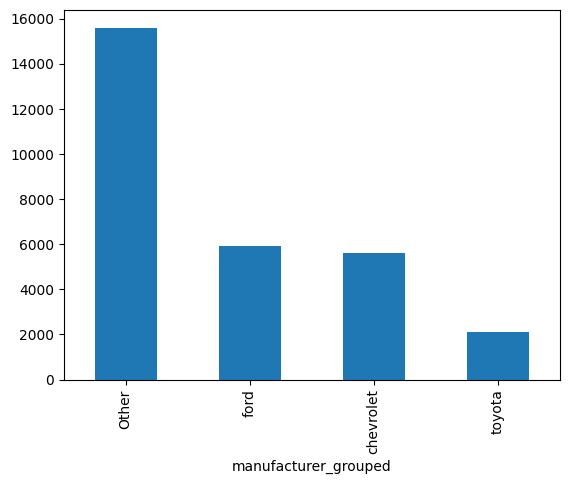

In [102]:
df['manufacturer_grouped'].value_counts().plot(kind='bar')

<Axes: xlabel='condition'>

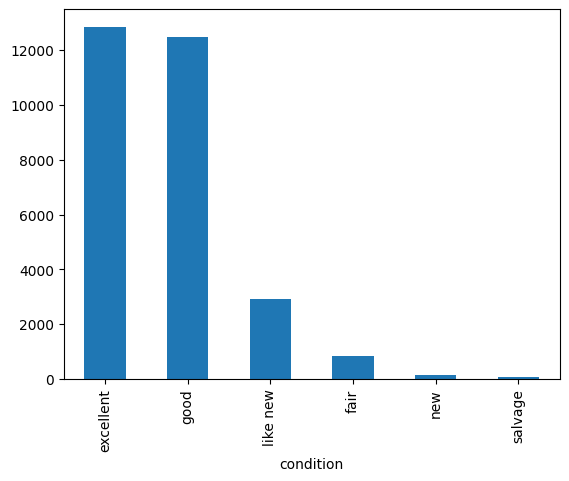

In [103]:
df['condition'].value_counts().plot(kind='bar')

<Axes: xlabel='cylinders'>

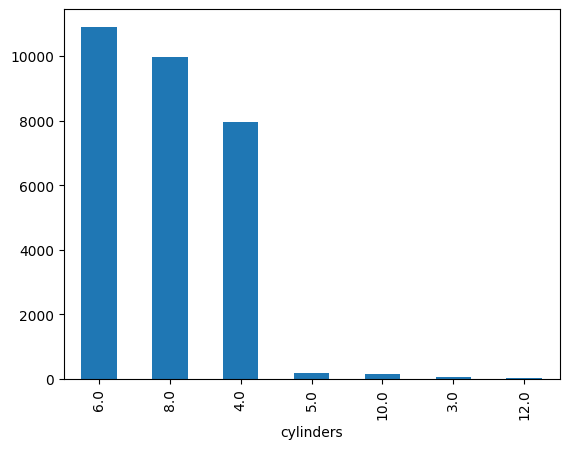

In [104]:
df['cylinders'].value_counts().plot(kind='bar')

<Axes: xlabel='fuel'>

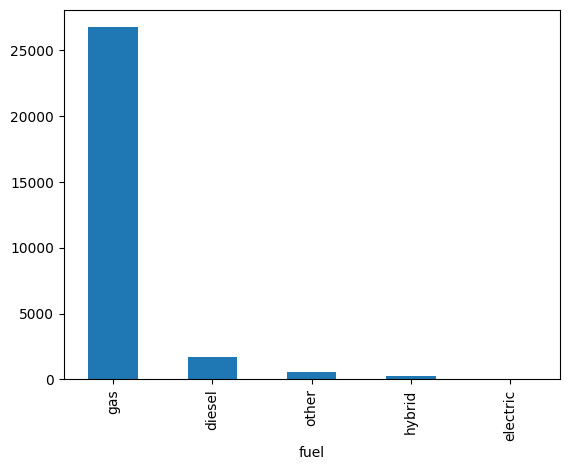

In [105]:
df['fuel'].value_counts().plot(kind='bar')

<Axes: xlabel='transmission'>

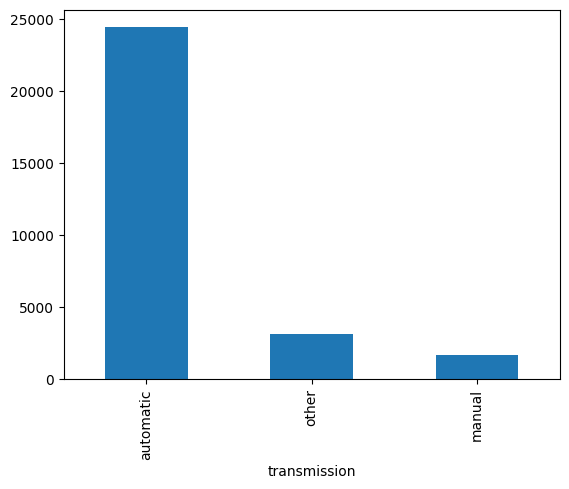

In [106]:
df['transmission'].value_counts().plot(kind='bar')

<Axes: xlabel='state_grouped'>

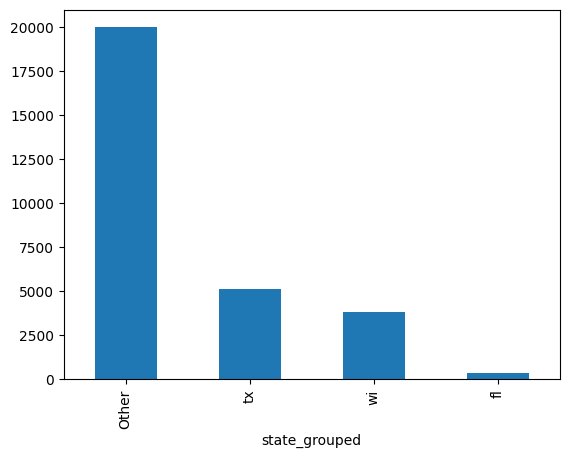

In [107]:
df['state_grouped'].value_counts().plot(kind='bar')

<Axes: xlabel='paint_color'>

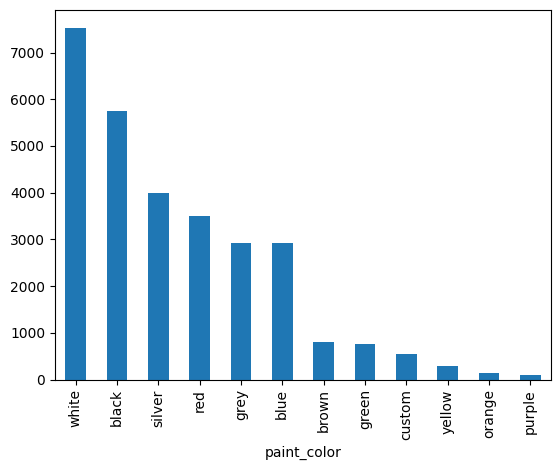

In [108]:
df['paint_color'].value_counts().plot(kind='bar')

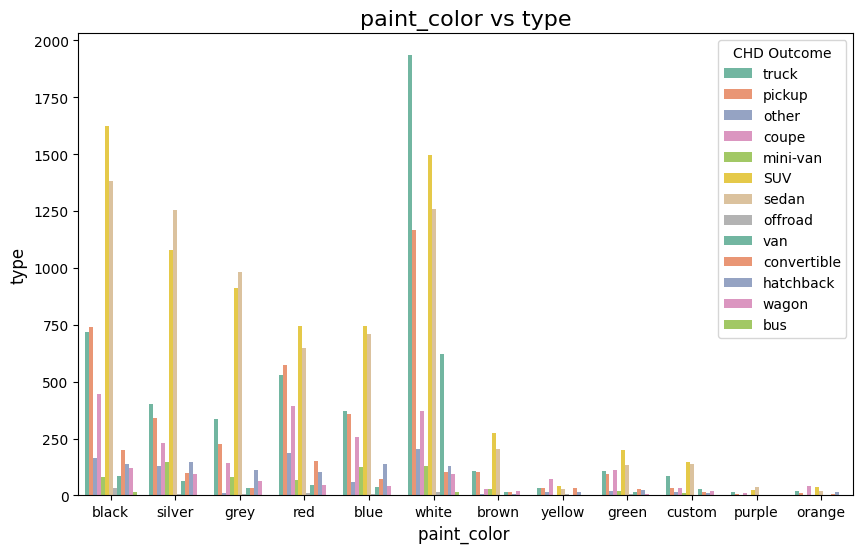

In [109]:
plt.figure(figsize=(10, 6))
sns.countplot(x="paint_color", hue="type", data=df, palette="Set2")
plt.title("paint_color vs type", fontsize=16)
plt.xlabel("paint_color ", fontsize=12)
plt.ylabel("type", fontsize=12)
plt.legend(title="CHD Outcome")
plt.show()

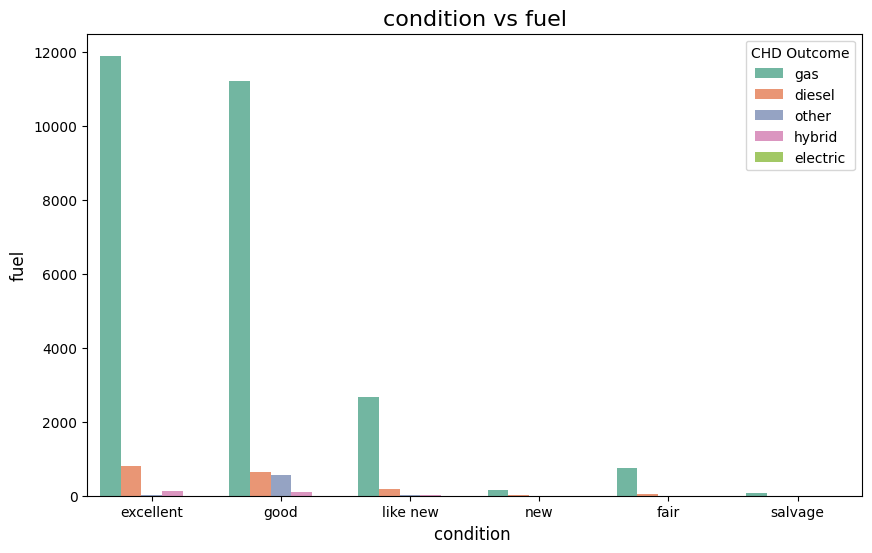

In [110]:
plt.figure(figsize=(10, 6))
sns.countplot(x="condition", hue="fuel", data=df, palette="Set2")
plt.title("condition vs fuel", fontsize=16)
plt.xlabel("condition ", fontsize=12)
plt.ylabel("fuel", fontsize=12)
plt.legend(title="CHD Outcome")
plt.show()

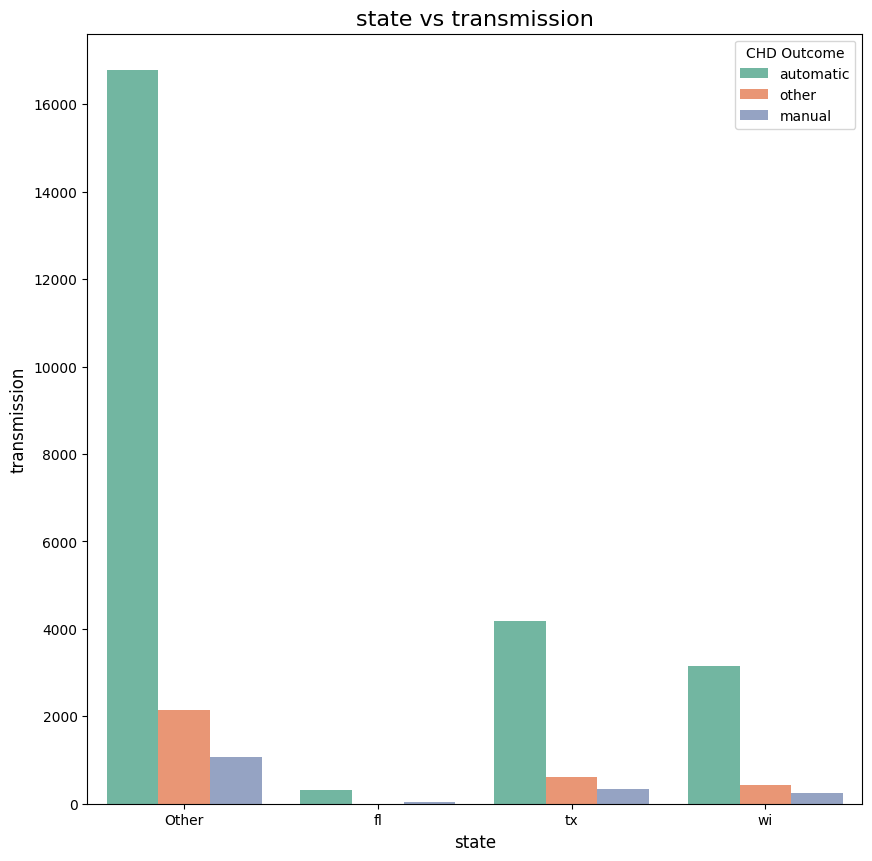

In [111]:
plt.figure(figsize=(10, 10))
sns.countplot(x="state_grouped", hue="transmission", data=df, palette="Set2")
plt.title("state vs transmission", fontsize=16)
plt.xlabel("state", fontsize=12)
plt.ylabel("transmission", fontsize=12)
plt.legend(title="CHD Outcome")
plt.show()

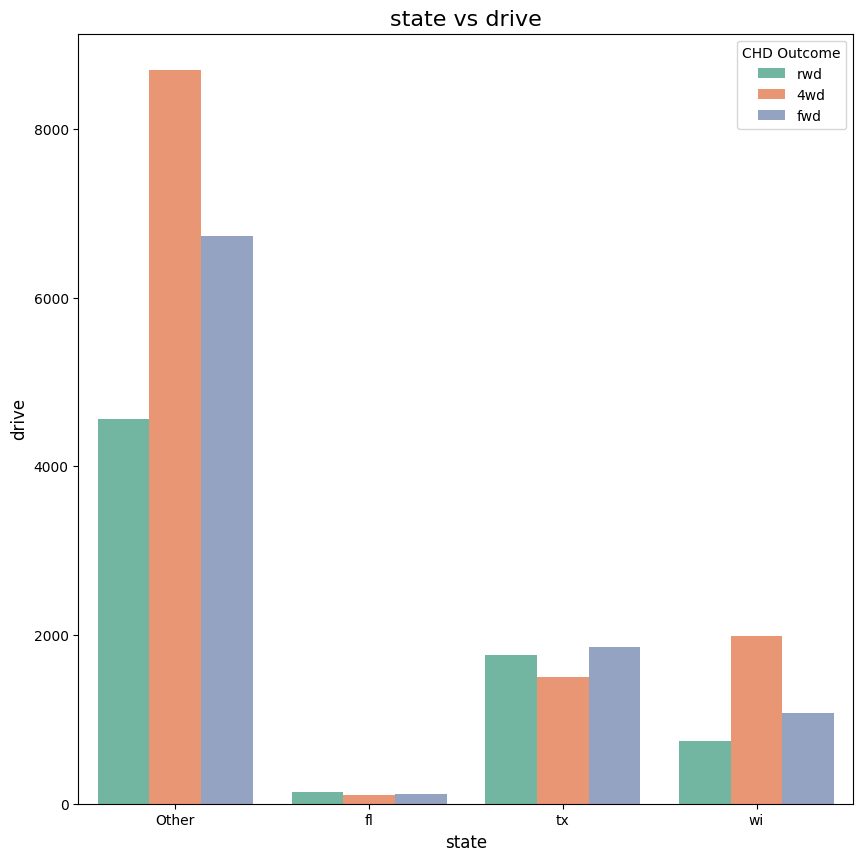

In [112]:
plt.figure(figsize=(10, 10))
sns.countplot(x="state_grouped", hue="drive", data=df, palette="Set2")
plt.title("state vs drive", fontsize=16)
plt.xlabel("state", fontsize=12)
plt.ylabel("drive", fontsize=12)
plt.legend(title="CHD Outcome")
plt.show()

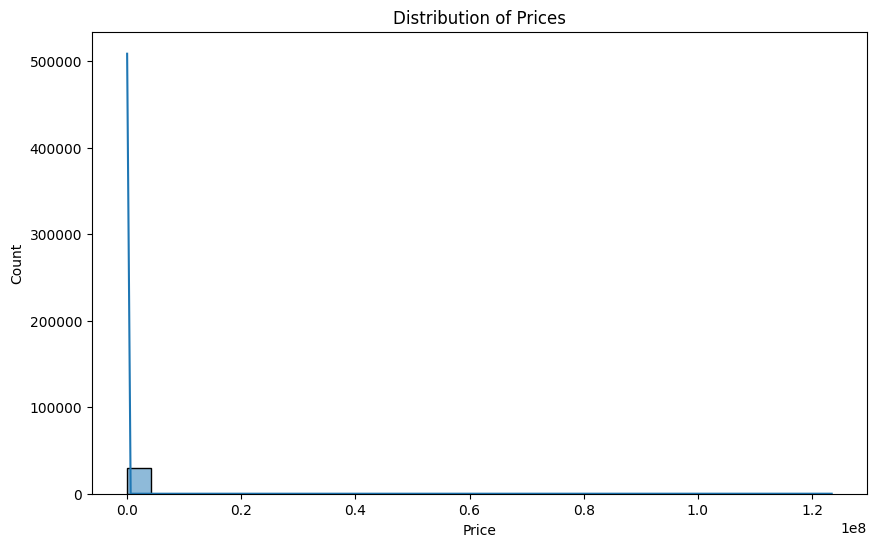

In [113]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.show()

In [114]:
df.columns

Index(['region', 'price', 'year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'lat', 'long', 'manufacturer_grouped', 'model_grouped',
       'state_grouped', 'car_age', 'posting_year', 'posting_month',
       'posting_day'],
      dtype='object')

In [115]:
df.dtypes

region                   object
price                     int64
year                    float64
model                    object
condition                object
cylinders               float64
fuel                     object
odometer                float64
title_status             object
transmission             object
drive                    object
type                     object
paint_color              object
lat                     float64
long                    float64
manufacturer_grouped     object
model_grouped            object
state_grouped            object
car_age                 float64
posting_year            float64
posting_month           float64
posting_day             float64
dtype: object

In [244]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [245]:
#columns_to_encode = ['drive', 'condition']
le=LabelEncoder()

In [246]:
for col in ['condition', 'fuel', 'transmission', 'drive', 'type', 'paint_color','title_status']:
    df[col] = le.fit_transform(df[col].astype(str))

In [247]:
df = pd.get_dummies(df, columns=['region', 'manufacturer_grouped', 'state_grouped','model_grouped'], drop_first=True)

In [120]:
'''df = pd.get_dummies(df, columns=['region',  'year', 'model',  'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'type',
       'paint_color', 'lat', 'long', 'posting_date', 'manufacturer_grouped',
       'state_grouped', 'car_age', 'posting_year', 'posting_month'], drop_first=True)'''

"df = pd.get_dummies(df, columns=['region',  'year', 'model',  'cylinders', 'fuel',\n       'odometer', 'title_status', 'transmission', 'type',\n       'paint_color', 'lat', 'long', 'posting_date', 'manufacturer_grouped',\n       'state_grouped', 'car_age', 'posting_year', 'posting_month'], drop_first=True)"

In [248]:
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
numerical_columns = ['odometer', 'lat','long','year', 'car_age', 'posting_year', 'posting_month','posting_day']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [249]:
df.head()

,price,year,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,...,model_grouped_civic,model_grouped_corvette,model_grouped_escape,model_grouped_explorer,model_grouped_f-150,model_grouped_mustang,model_grouped_silverado,model_grouped_silverado 1500,model_grouped_tacoma,model_grouped_wrangler
31,15000,0.295455,0,6.0,2,0.046078,0,0,2,10,...,False,False,False,False,False,False,False,False,False,False
32,27990,0.187780,2,8.0,2,-0.164575,0,2,0,8,...,False,False,False,False,False,False,False,False,False,False
33,34590,0.618480,2,6.0,2,-0.303806,0,2,0,8,...,False,False,False,False,False,False,False,False,False,False
34,35000,0.941506,0,6.0,2,-0.255849,0,0,0,10,...,False,False,False,False,False,False,False,False,True,False
35,29990,0.618480,2,6.0,2,-0.347130,0,2,0,8,...,False,False,False,False,False,False,False,False,False,False


In [250]:
#global_mean = df['price'].mean()

In [251]:
#model_target_mean = df.groupby('model')['price'].mean()
#df['model'] = df['model'].map(model_target_mean)

In [252]:
#region_target_mean = df.groupby('region')['price'].mean()
#df['region'] = df['region'].map(region_target_mean)

In [253]:
#state_target_mean = df.groupby('state_grouped')['price'].mean()
#df['state_grouped'] = df['state_grouped'].map(state_target_mean)

In [254]:
#df['model'] = df['model'].fillna(global_mean)
#df['region'] = df['region'].fillna(global_mean)
#df['state_grouped'] = df['state_grouped'].fillna(global_mean)

In [255]:
#df.head()

In [256]:
#numerical_columns = ['model', 'region','state_grouped']

In [257]:
#df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [258]:
from sklearn.model_selection import train_test_split

In [259]:
X= df.drop('price', axis=1)
y= df['price']

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2,random_state= 42)

In [261]:
X_train.shape

(23426, 180)

In [262]:
X_test.shape

(5857, 180)

In [263]:
y_train.shape

(23426,)

In [264]:
y_test.shape

(5857,)

In [265]:
print(X_train.dtypes)

year                            float64
condition                         int32
cylinders                       float64
fuel                              int32
odometer                        float64
                                 ...   
model_grouped_mustang              bool
model_grouped_silverado            bool
model_grouped_silverado 1500       bool
model_grouped_tacoma               bool
model_grouped_wrangler             bool
Length: 180, dtype: object


In [266]:
print(y_train.dtypes)

int64


In [267]:
non_numeric_cols = X_train.select_dtypes(include=['object', 'datetime64']).columns
print(non_numeric_cols)

Index([], dtype='object')


In [268]:
from sklearn.linear_model import LinearRegression

In [269]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [270]:
y_pred = model.predict(X_test)

In [271]:
y_pred

array([56480.203125, 50694.046875,  5319.9375  , ..., 27395.640625,
       -6982.796875,  6123.078125])

In [272]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.4308915059744335e+24


In [273]:
r2 = r2_score(y_test, y_pred)
print(f"R-Squared :{r2}")

R-Squared :-7943061284986803.0


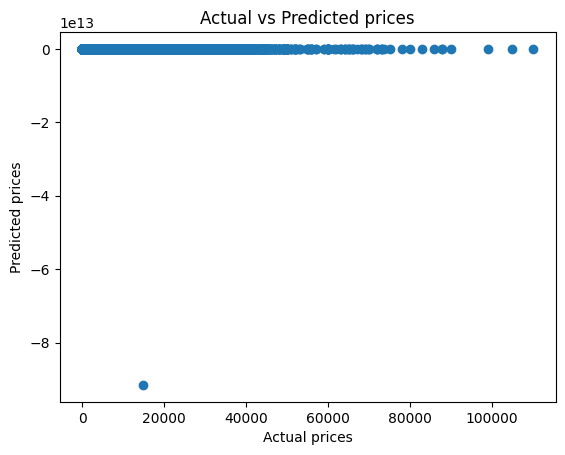

In [274]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual vs Predicted prices")
plt.show()

In [275]:
from sklearn.ensemble import RandomForestRegressor

In [276]:
drf =  RandomForestRegressor(random_state=42)

In [277]:
drf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [278]:
y_pred_rf = drf.predict(X_test)

In [279]:
y_pred_rf

array([ 5007.84,  3057.5 , 29590.  , ..., 10909.71,  7883.85, 16679.33])

In [280]:
mse = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 32383768.165396865


In [281]:
r2 = r2_score(y_test, y_pred_rf)
print(f"R-Squared :{r2}")

R-Squared :0.8202335717959401


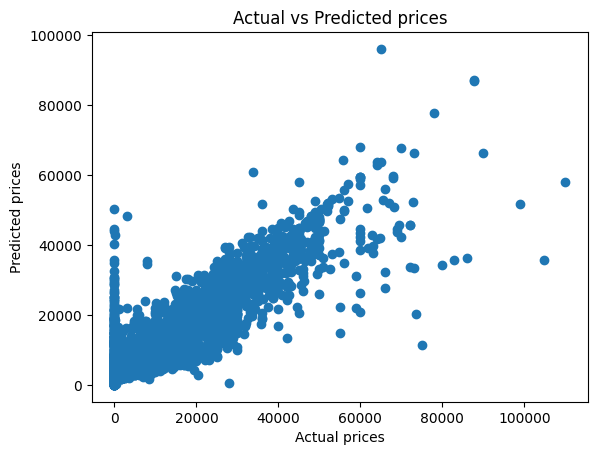

In [282]:
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual vs Predicted prices")
plt.show()

In [283]:
import xgboost as xgb

In [284]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.9, learning_rate=0.2,
                         max_depth=7, alpha=0, n_estimators=300)

In [285]:
xgb_model.fit(X_train, y_train)

XGBRegressor(alpha=0, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, ...)

In [286]:
y_pred_xgb = xgb_model.predict(X_test)

In [287]:
y_pred_xgb

array([ 5836.4717,  7532.467 , 27386.168 , ..., 10093.8955,  2231.286 ,
       18325.283 ], dtype=float32)

In [288]:
mse = mean_squared_error(y_test, y_pred_xgb)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 26676491.087838177


In [290]:
r2 = r2_score(y_test, y_pred_xgb)
print(f"R-Squared :{r2}")

R-Squared :0.8519153949168184


In [291]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import numpy as np

# Define the parameter grid in batches
param_grid_batches = [
    {'learning_rate': [0.01, 0.1], 'n_estimators': [100, 200], 'max_depth': [3, 5]},
    {'learning_rate': [0.05, 0.2], 'n_estimators': [300, 500], 'max_depth': [7, 10]},
]


In [292]:
best_models = []
best_scores = []

for i, param_grid in enumerate(param_grid_batches):
    print(f"Running batch {i + 1}/{len(param_grid_batches)}...")
    
    # Create the model and GridSearchCV
    model = XGBRegressor()
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                               scoring='neg_mean_squared_error', cv=3, verbose=2)
    
    # Fit the GridSearchCV
    grid_search.fit(X_train, y_train)
    
    # Store results
    best_models.append(grid_search.best_estimator_)
    best_scores.append(grid_search.best_score_)
    
    print(f"Batch {i + 1} Best Parameters: {grid_search.best_params_}")
    print(f"Batch {i + 1} Best Score: {grid_search.best_score_}")


Running batch 1/2...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=200; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=200; total time=   0.4s
[CV] END ..learning_rate=0.0

In [293]:
# Find the batch with the best score
best_batch_idx = np.argmax(best_scores)
best_model = best_models[best_batch_idx]

print(f"Overall Best Batch: {best_batch_idx + 1}")
print(f"Best Model Parameters: {best_model.get_params()}")


Overall Best Batch: 1
Best Model Parameters: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 5, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [294]:
from sklearn.neighbors import KNeighborsRegressor

In [295]:
knn_model = KNeighborsRegressor(n_neighbors=5)

In [296]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [297]:
y_pred_knn = knn_model.predict(X_test)

In [298]:
y_pred_knn

array([ 6504. ,  4968.8, 29590. , ..., 10039. , 10379.8,  3779. ])

In [299]:
mse = mean_squared_error(y_test, y_pred_knn)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 66285938.25539354


In [300]:
r2 = r2_score(y_test, y_pred_knn)
print(f"R-Squared :{r2}")

R-Squared :0.6320383008096144


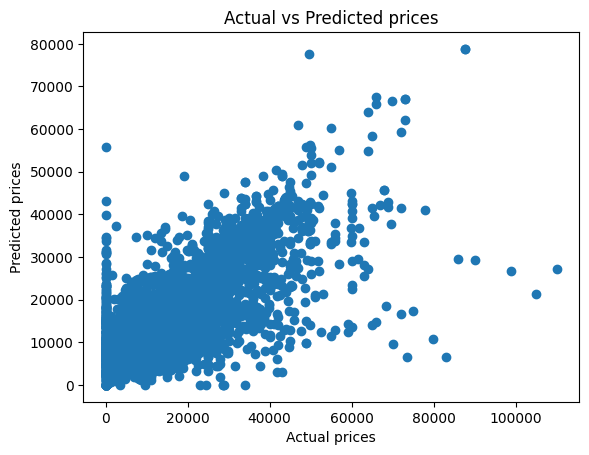

In [301]:
plt.scatter(y_test, y_pred_knn)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual vs Predicted prices")
plt.show()

In [302]:
import pickle

In [303]:
with open ('price_prediction_model.pkl','wb') as f:
    pickle.dump(xgb_model,f)